In [1]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar

In [2]:
df_st = pd.read_csv("C:/Users/nhatp/PycharmProjects/TAMUDatathon/stocks_daily.csv", parse_dates=True)

In [3]:
df_st.head(3)

Unnamed: 0  SYMBOL                 EXCHANGE                INDUSTRY  \
0           0       A  New York Stock Exchange  Diagnostics & Research   
1           1      AA  New York Stock Exchange                Aluminum   
2           2  AAA.AS                Amsterdam                     NaN   

            SECTOR    PRICE     HIGH      LOW     VOLUME        DATE  
0       Healthcare  103.105  66.3949  65.8449  1047800.0  2018-01-02  
1  Basic Materials   11.940  55.2200  53.9100  2928900.0  2018-01-02  
2      Industrials    0.070  15.3000  15.2500    60800.0  2018-01-02

In [4]:
df_st['DATE'] = pd.to_datetime(df_st['DATE'])

In [5]:
df_st.drop(['Unnamed: 0', 'INDUSTRY'], axis=1, inplace=True)

In [6]:
df_st.isna().sum()

SYMBOL            0
EXCHANGE      12647
SECTOR      2200615
PRICE             0
HIGH              0
LOW               0
VOLUME            0
DATE              0
dtype: int64

In [7]:
df_st['EXCHANGE'].unique()

array(['New York Stock Exchange', 'Amsterdam', 'Toronto',
       'Nasdaq Global Select', 'NYSE Arca', 'NASDAQ Global Market',
       'NYSE American', 'Paris', 'NASDAQ Capital Market', 'Brussels',
       'NYSE', 'NasdaqCM', 'YHD', 'NasdaqGS', 'Lisbon', 'NYSEArca',
       'Other OTC', nan, 'BATS Exchange', 'NasdaqGM', 'Nasdaq', 'MCX',
       'Swiss', 'BATS'], dtype=object)

<AxesSubplot:>

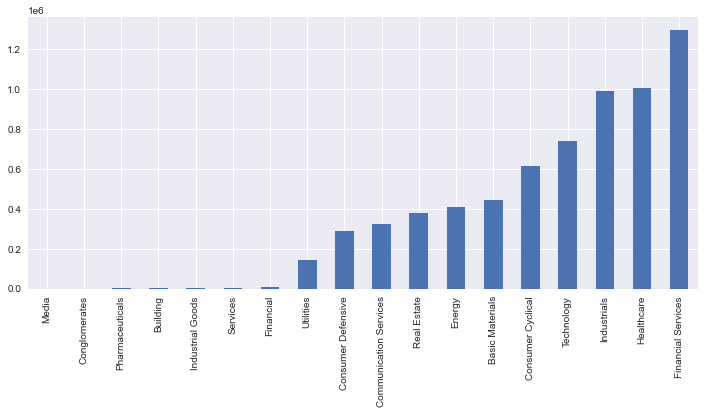

In [8]:
df_st['SECTOR'].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:>

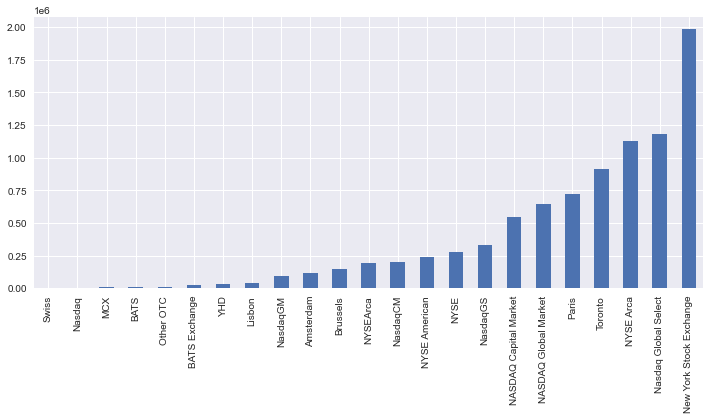

In [9]:
df_st['EXCHANGE'].value_counts(ascending=True).plot(kind='bar')

In [10]:
df_st.loc[df_st['EXCHANGE'] == 'New York Stock Exchange', 'EXCHANGE'] = 'NYSE'
df_st.loc[df_st['EXCHANGE'] == 'Nasdaq Global Select', 'EXCHANGE'] = 'NasdaqGS'
df_st.loc[df_st['EXCHANGE'] == 'NYSEArca', 'EXCHANGE'] = 'NYSE Arca'
df_st.loc[df_st['EXCHANGE'] == 'NASDAQ Capital Market', 'EXCHANGE'] = 'NasdaqCM'
df_st.loc[df_st['EXCHANGE'] == 'NASDAQ Global Market', 'EXCHANGE'] = 'NasdaqGM'

<AxesSubplot:>

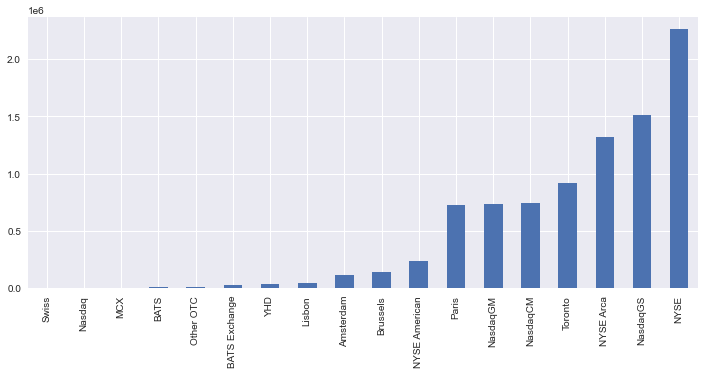

In [11]:
df_st['EXCHANGE'].value_counts(ascending=True).plot(kind='bar')

In [12]:
key = ['NYSE', 'NasdaqGS', 'NYSE Arca', 'Toronto']
df_st["EXCHANGE"]= df_st["EXCHANGE"].map(lambda x: x if x in key else "Other")

<AxesSubplot:>

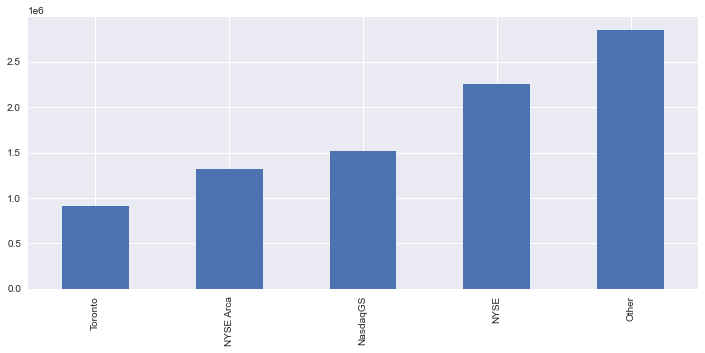

In [13]:
df_st['EXCHANGE'].value_counts(ascending=True).plot(kind='bar')

In [14]:
(len(df_st)-df_st['SECTOR'].notnull().sum())/ len(df_st)
#will remove those stocks without sector

0.24846154957838826

In [15]:
df_st.head(3)

#df_st[df_st['HIGH'].argmax(),]
df_st.iloc[df_st['HIGH'].idxmin()] 

SYMBOL                    EVSTC
EXCHANGE                  Other
SECTOR                      NaN
PRICE                     99.85
HIGH                      -0.02
LOW                       -0.02
VOLUME                    596.0
DATE        2021-01-11 00:00:00
Name: 7313822, dtype: object

In [16]:
#drop rows where sector = 'nan'
df_st = df_st[df_st['SECTOR'] != 'nan']
df_st['SECTOR'].unique()

array(['Healthcare', 'Basic Materials', 'Industrials',
       'Financial Services', nan, 'Technology', 'Consumer Cyclical',
       'Real Estate', 'Energy', 'Consumer Defensive', 'Utilities',
       'Financial', 'Communication Services', 'Pharmaceuticals',
       'Industrial Goods', 'Services', 'Conglomerates', 'Building',
       'Media'], dtype=object)

In [17]:
sect_set = set(df_st['SECTOR'])
sect_list = list(sect_set)
print(sect_list)

[nan, 'Industrial Goods', 'Energy', 'Industrials', 'Consumer Cyclical', 'Building', 'Services', 'Pharmaceuticals', 'Financial', 'Healthcare', 'Communication Services', 'Basic Materials', 'Media', 'Utilities', 'Technology', 'Consumer Defensive', 'Real Estate', 'Financial Services', 'Conglomerates']


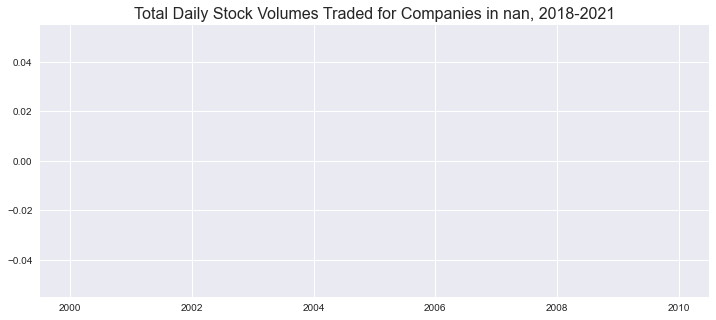

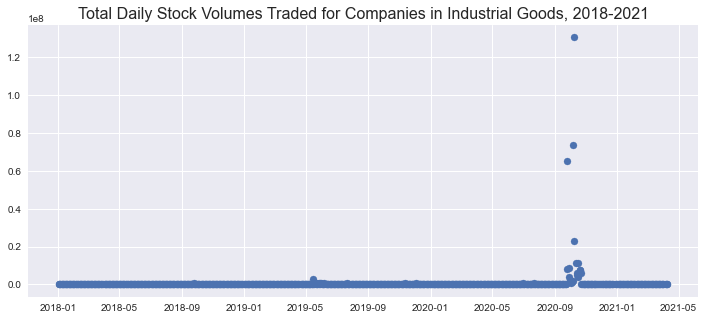

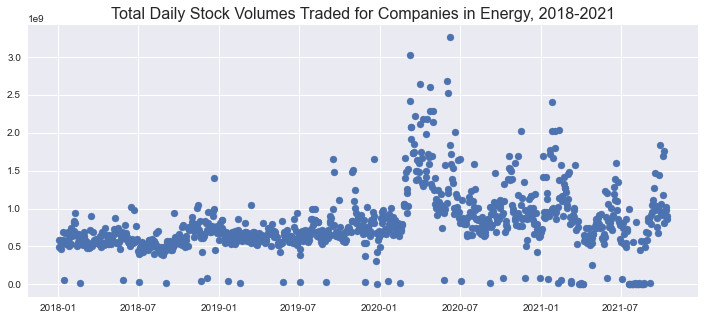

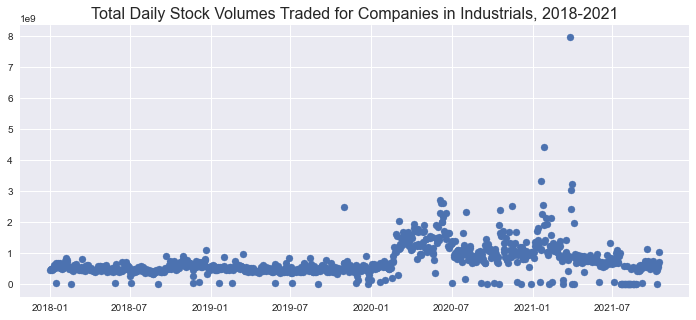

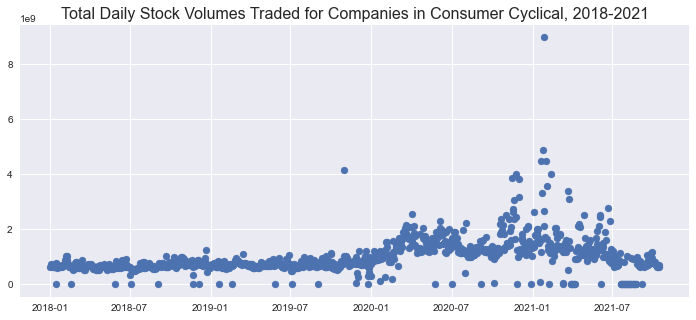

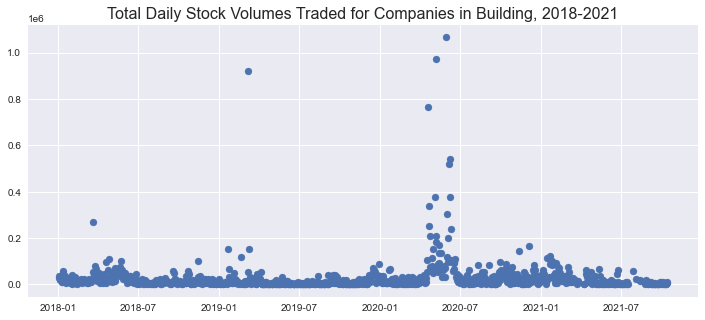

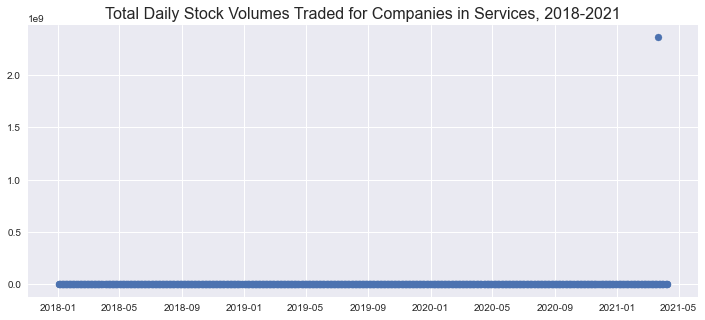

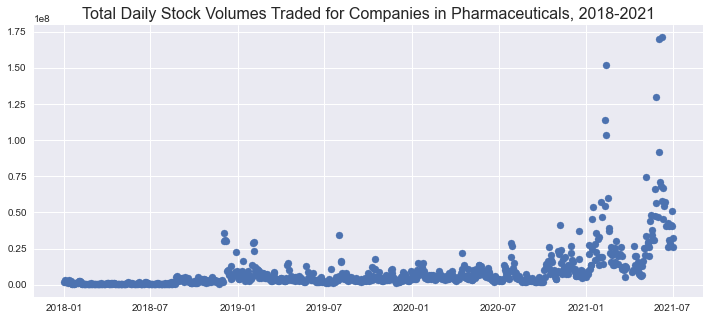

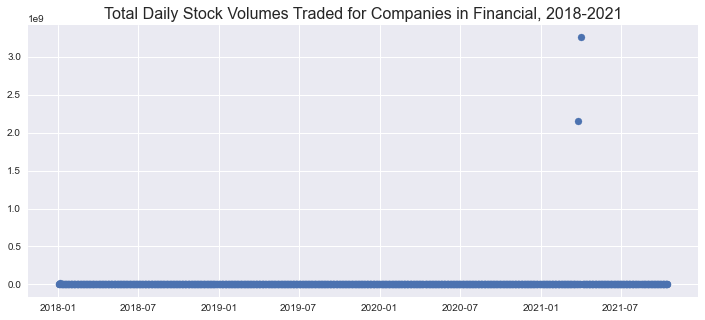

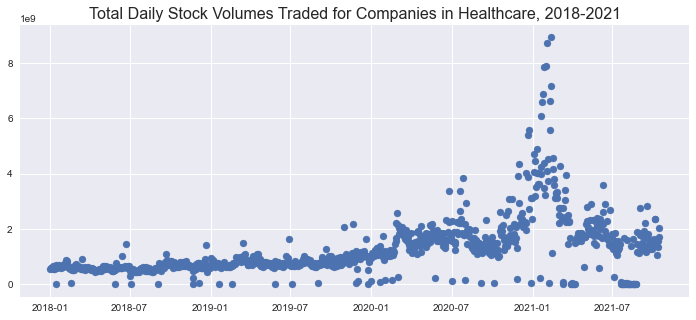

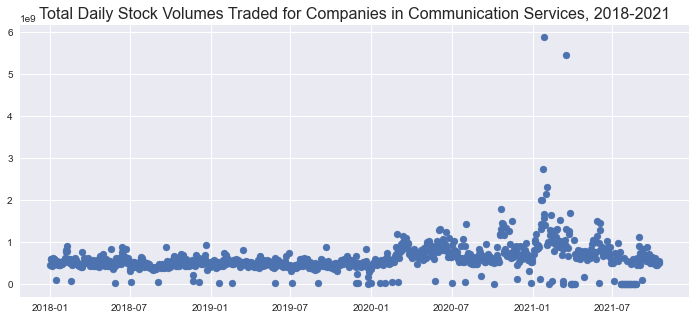

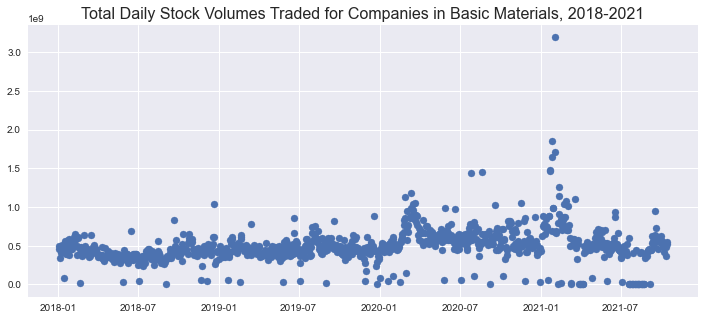

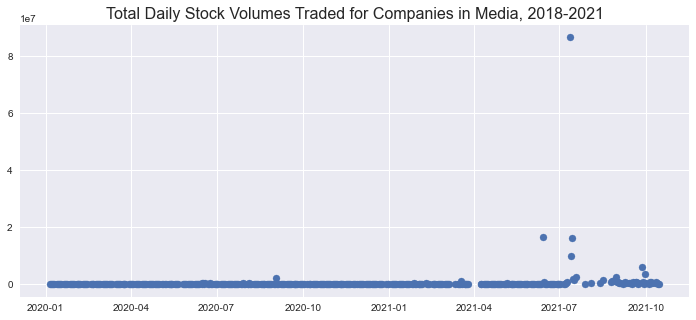

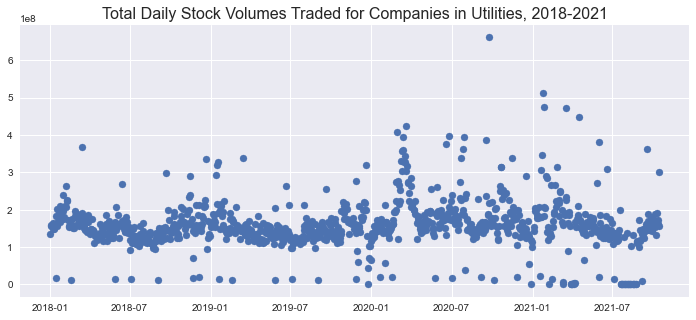

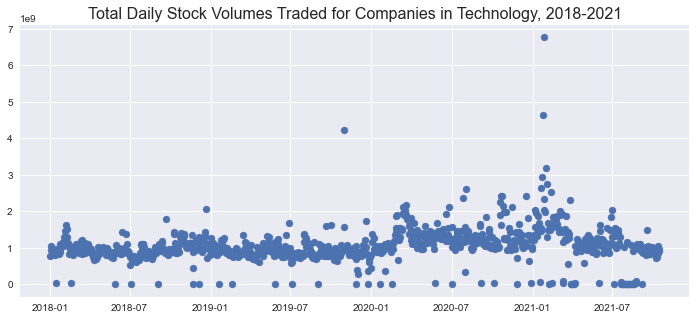

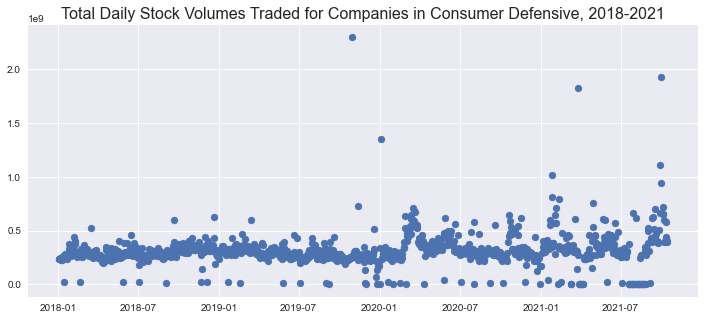

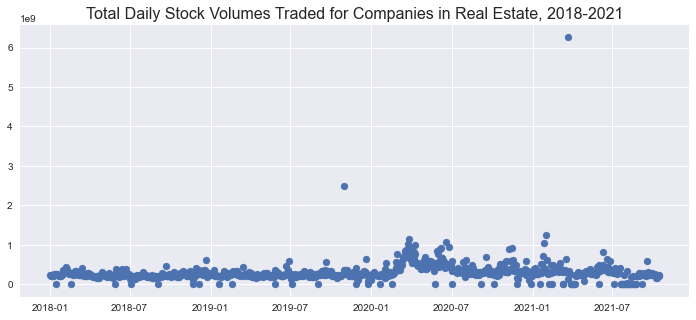

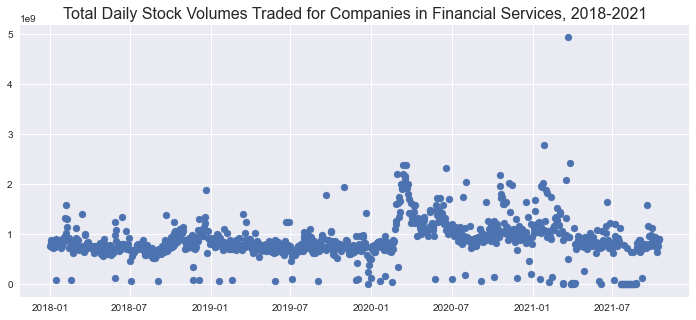

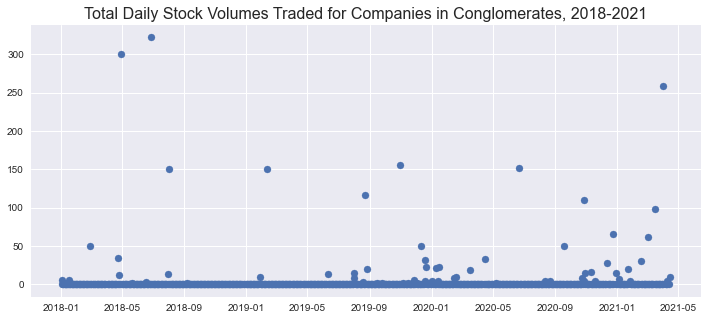

In [18]:
#plot before adjustment (get rid of outliers/ plot 05-95 quantile)

for i in range(len(sect_list)):
    df_sect = df_st.loc[df_st['SECTOR'] == sect_list[i]]
    df_sect1 =  df_sect.groupby('DATE',as_index=False).agg({'VOLUME':'sum'}) 
    plt.scatter(df_sect1["DATE"], df_sect1["VOLUME"])
    plt.title('Total Daily Stock Volumes Traded for Companies in '+ str(sect_list[i])+', 2018-2021', fontsize=16)
    plt.show()

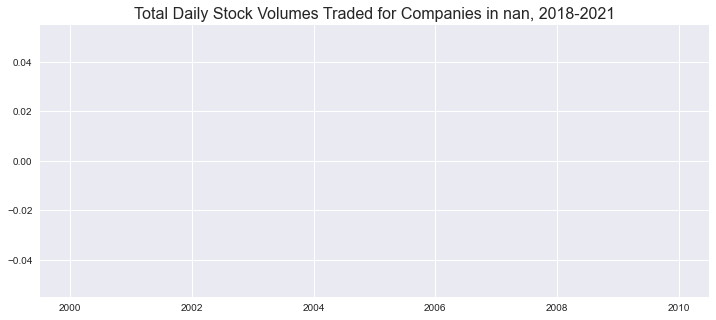

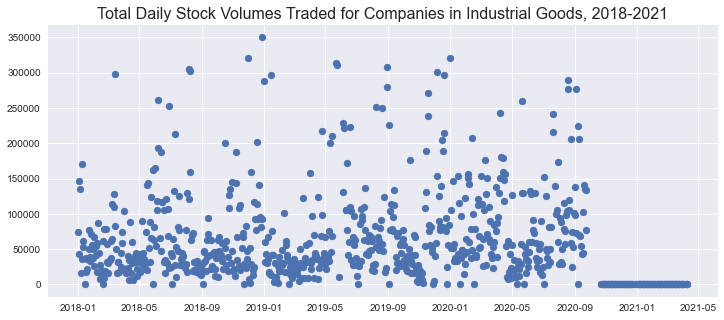

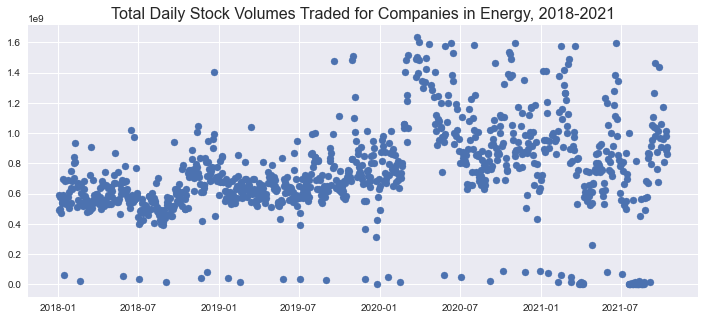

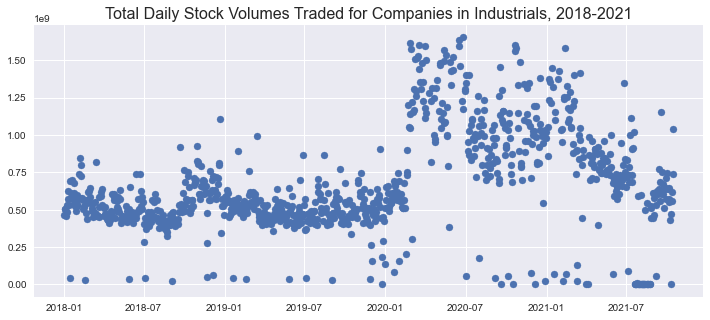

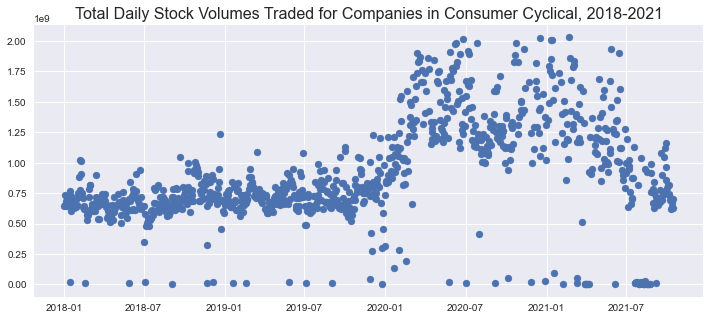

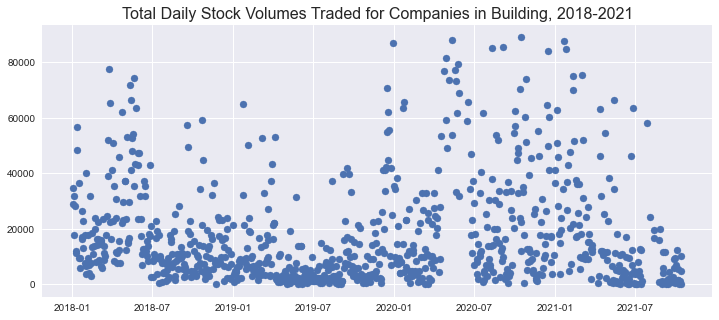

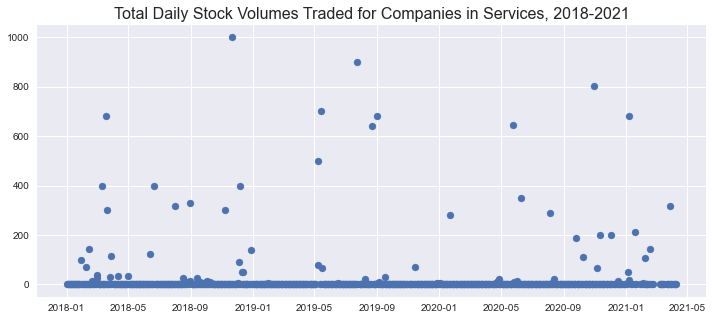

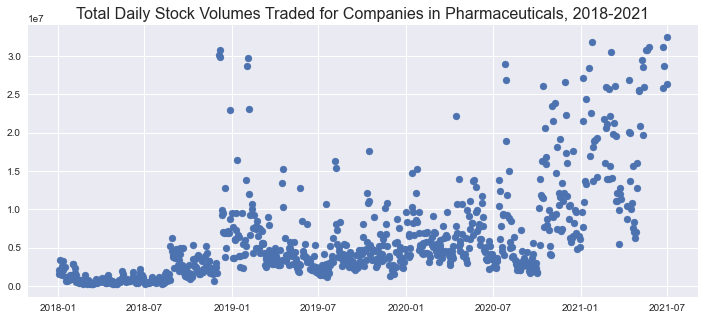

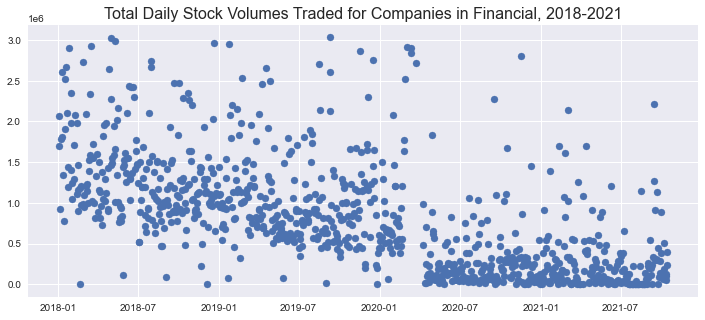

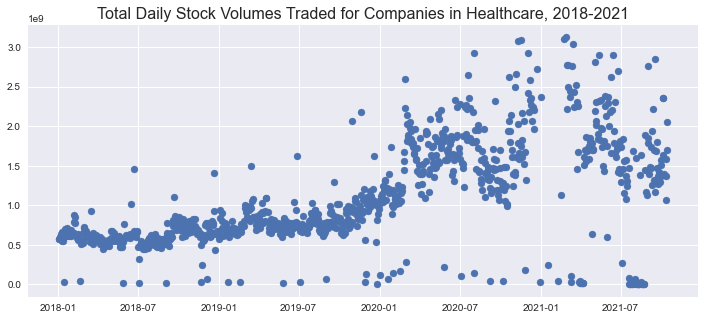

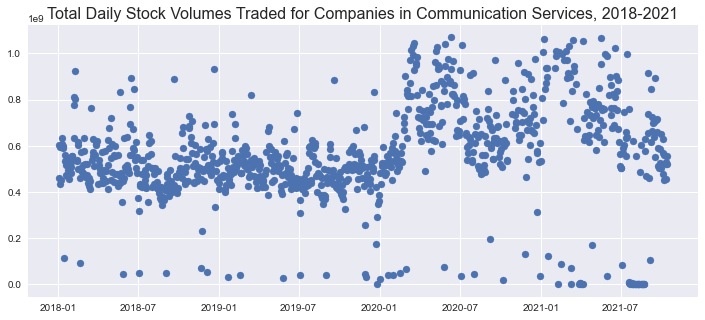

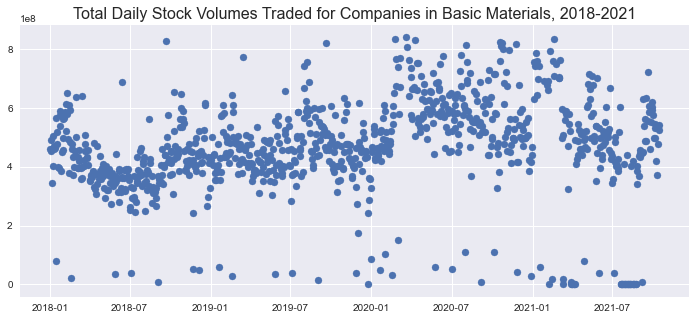

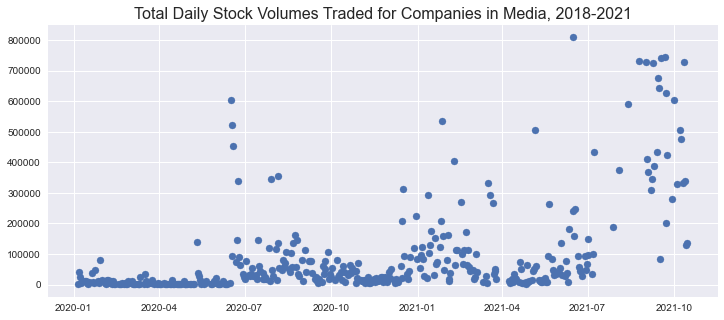

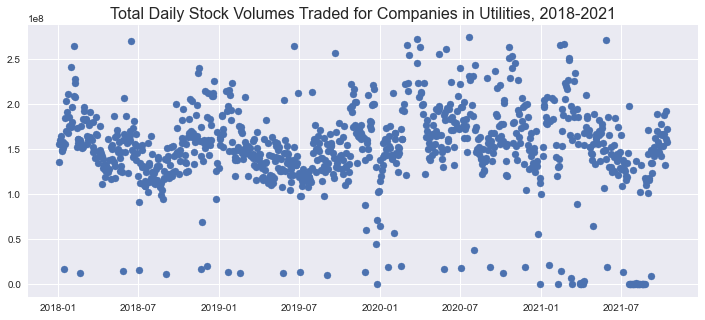

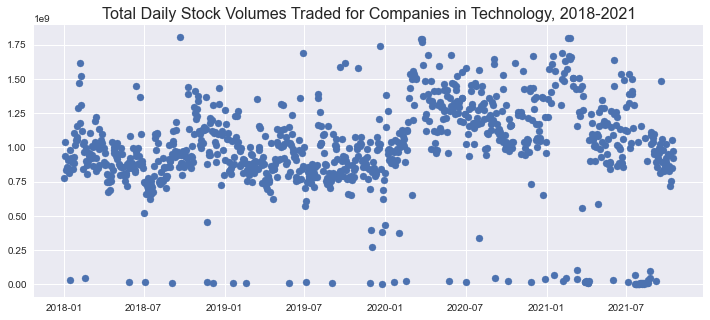

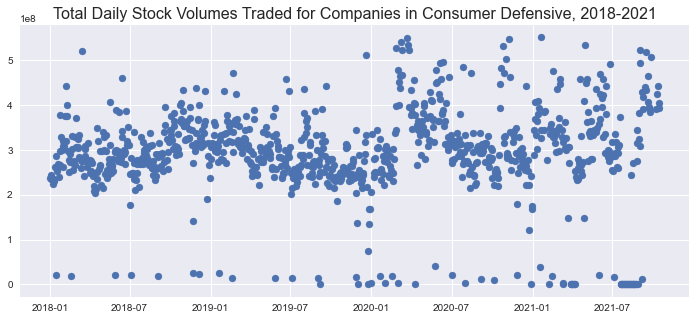

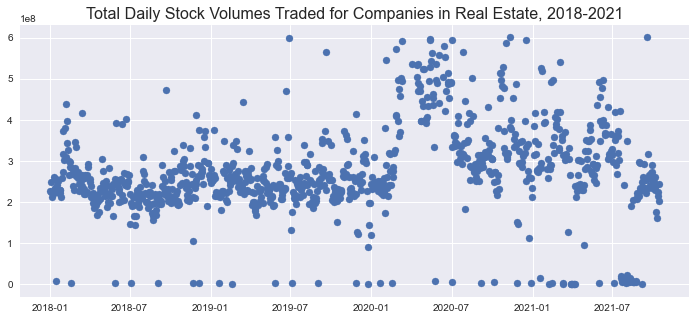

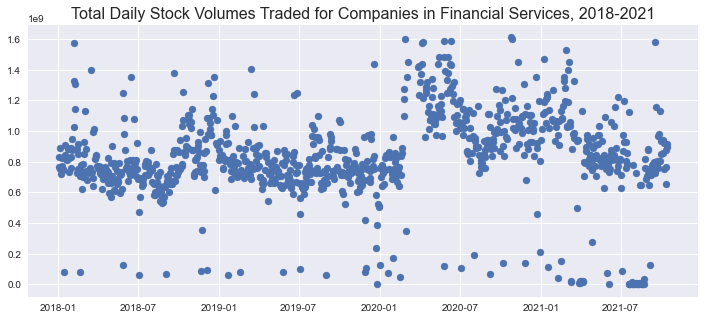

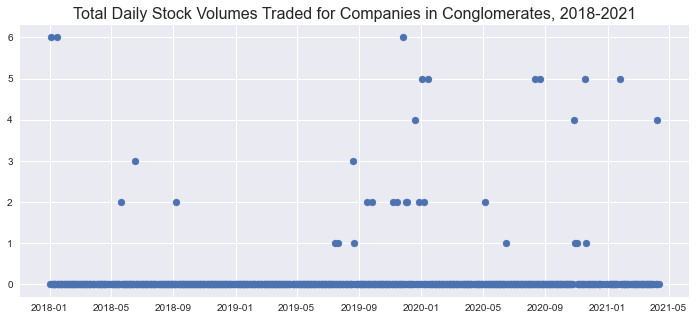

In [19]:
for i in range(len(sect_list)):
    df_sect = df_st.loc[df_st['SECTOR'] == sect_list[i]]
    df_sect1 =  df_sect.groupby('DATE',as_index=False).agg({'VOLUME':'sum'})
    df_sect1['VOLUME'] = df_sect1['VOLUME'][df_sect1['VOLUME'].between(df_sect1['VOLUME'].quantile(.0), df_sect1['VOLUME'].quantile(.95))] 
    plt.scatter(df_sect1["DATE"], df_sect1["VOLUME"])
    plt.title('Total Daily Stock Volumes Traded for Companies in '+ str(sect_list[i])+', 2018-2021', fontsize=16)
    plt.xlabel('', fontsize=14)
    plt.ylabel('', fontsize=14)
    plt.show()

In [20]:
#Mapping Stock Price
#Create a column showing average stock price for that day (avg(high, low))
df_st['AVG_PRICE'] = df_st[['HIGH', 'LOW']].mean(axis=1)

In [21]:
df_st.isna().sum()

SYMBOL             0
EXCHANGE           0
SECTOR       2200615
PRICE              0
HIGH               0
LOW                0
VOLUME             0
DATE               0
AVG_PRICE          0
dtype: int64

In [22]:
exc_set = set(df_st['EXCHANGE'])
exc_list = list(exc_set)
print(exc_list)
len(exc_list)

['Other', 'Toronto', 'NYSE Arca', 'NasdaqGS', 'NYSE']


5

In [23]:
#generate a list of N colors:
#from random import randint

color = ['tab:blue', 'tab:orange', 'tab:pink', 'tab:green', 'tab:purple']
#n = 8

#for i in range(n):
#    color.append('#%06X' % randint(0, 0xFFFFFF))
    
    
print(color)

['tab:blue', 'tab:orange', 'tab:pink', 'tab:green', 'tab:purple']


In [24]:
#create an Exchange: Color dictionary
zip_iterator = zip(exc_list, color)
c_dictionary = dict(zip_iterator)


print(c_dictionary)

{'Other': 'tab:blue', 'Toronto': 'tab:orange', 'NYSE Arca': 'tab:pink', 'NasdaqGS': 'tab:green', 'NYSE': 'tab:purple'}


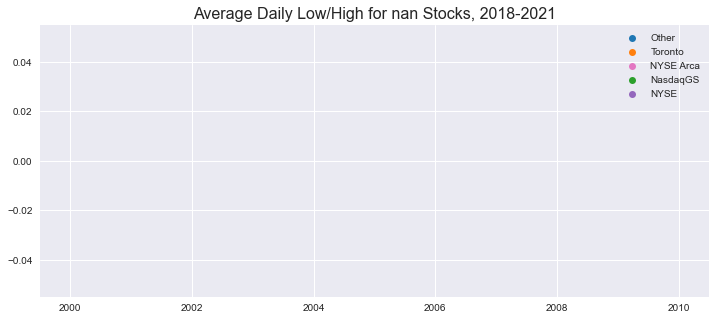

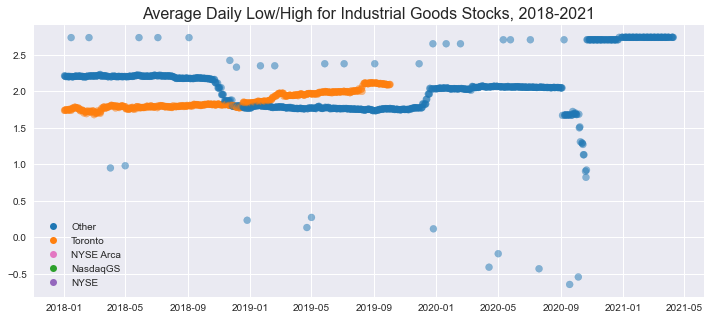

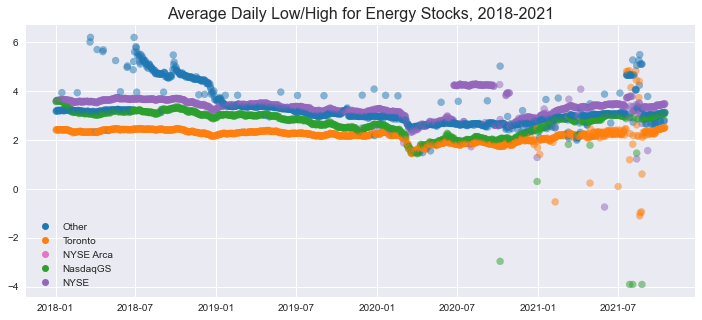

C:\Users\nhatp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


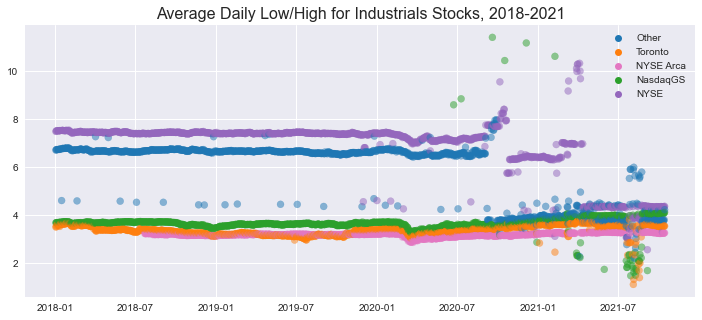

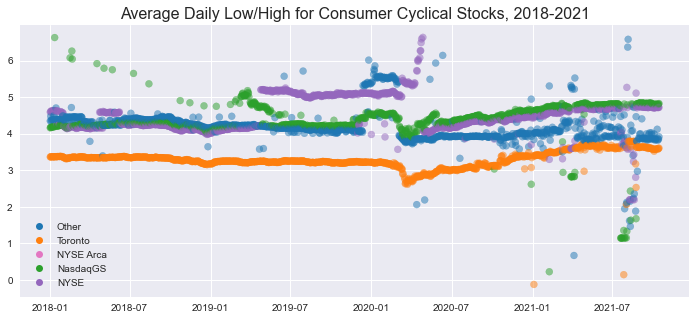

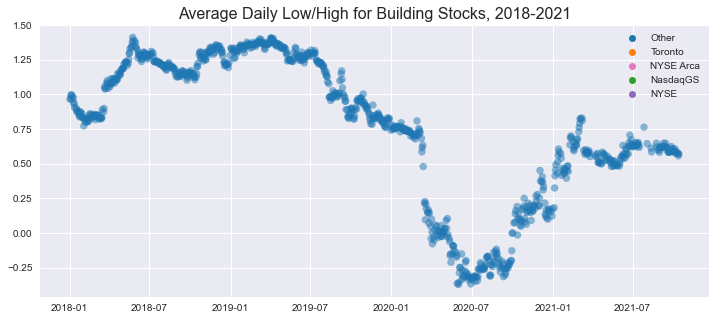

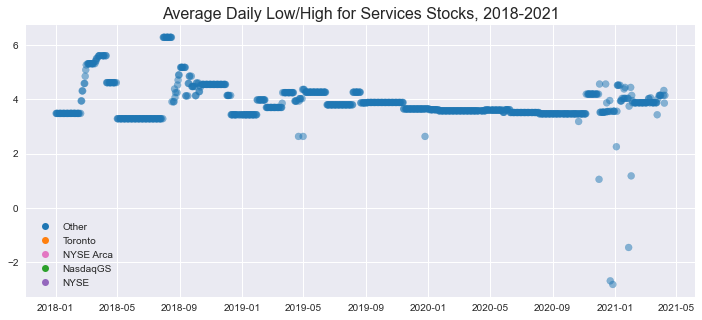

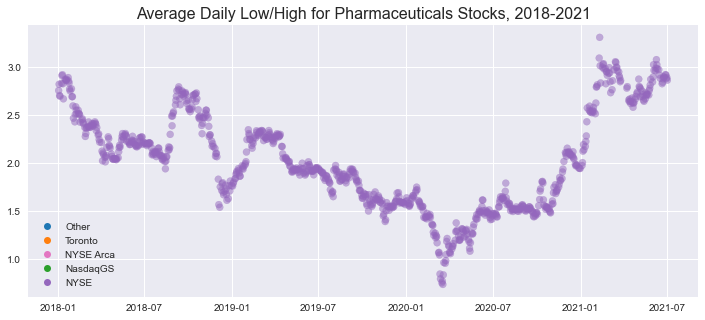

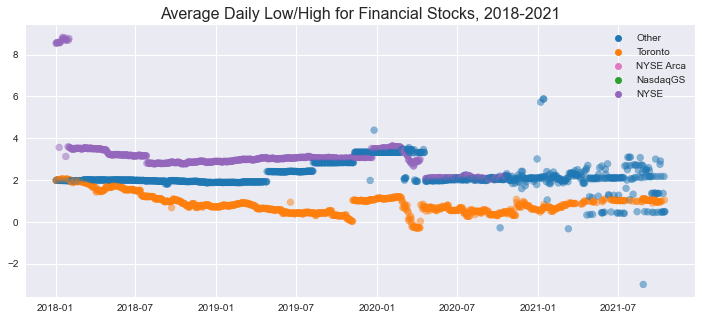

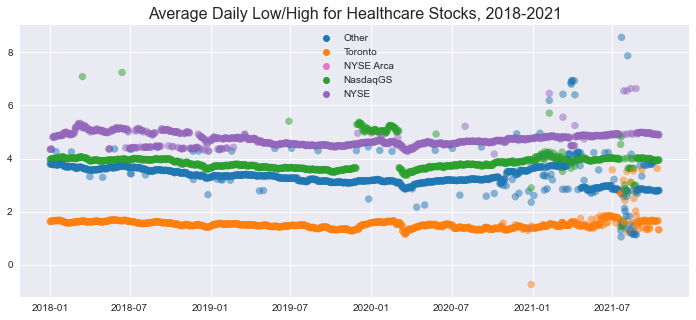

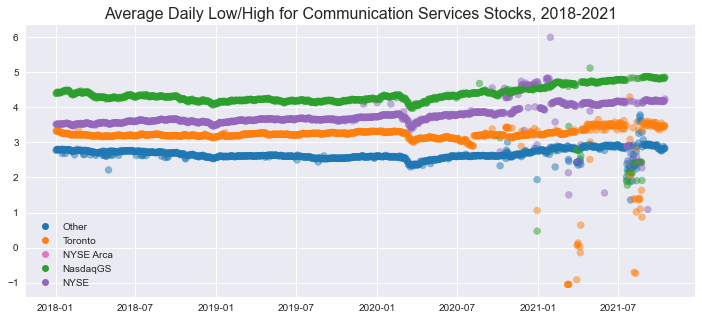

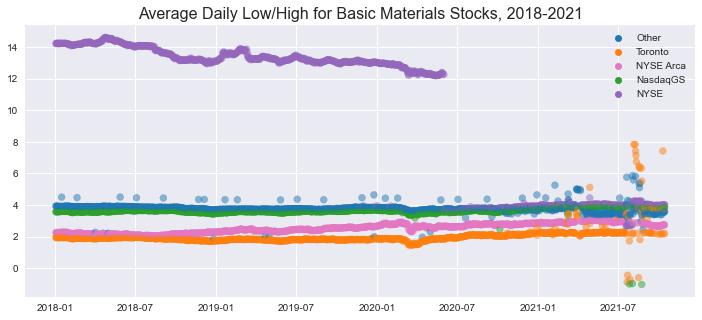

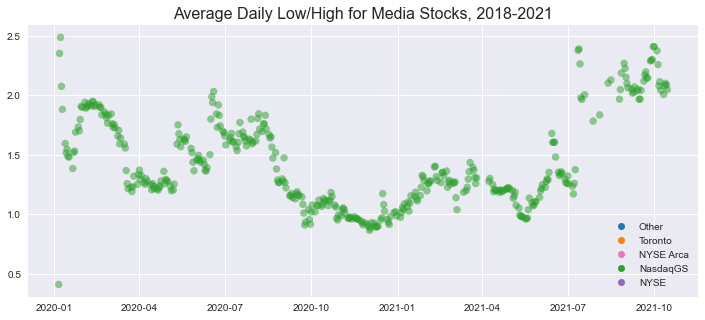

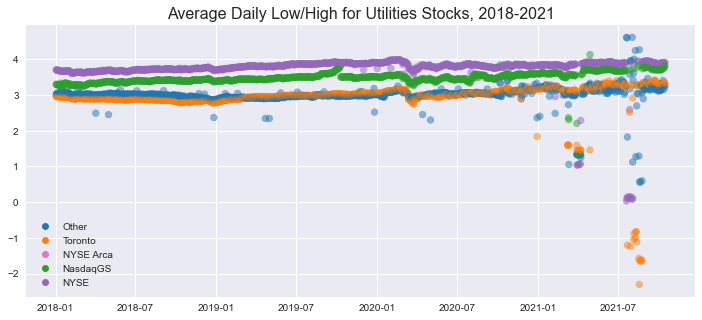

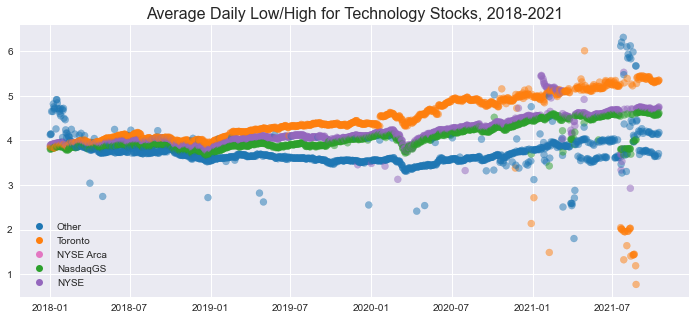

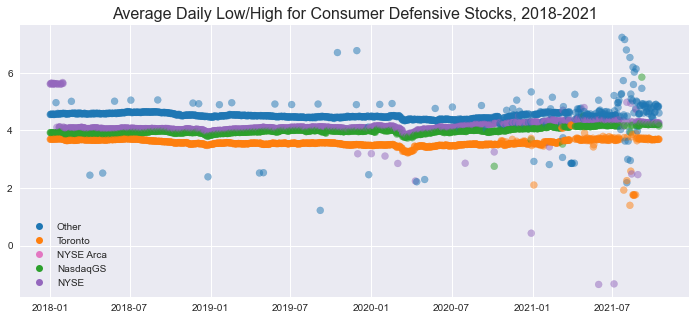

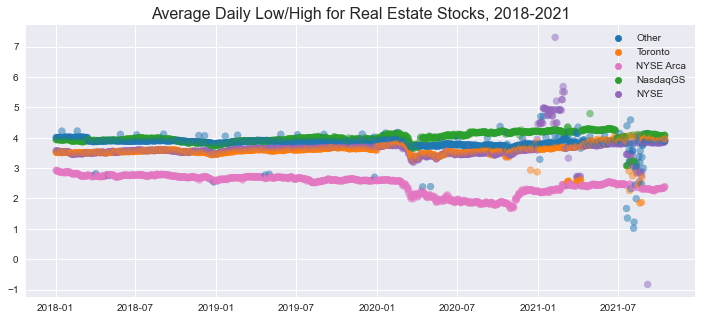

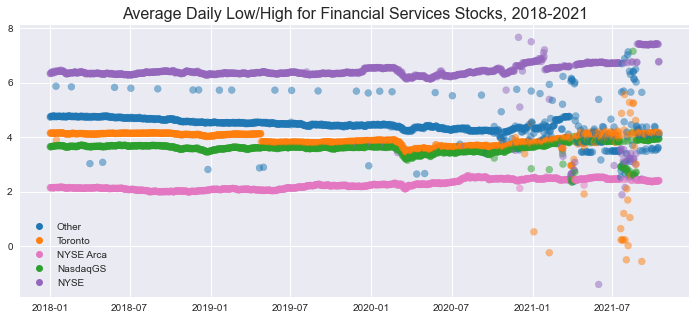

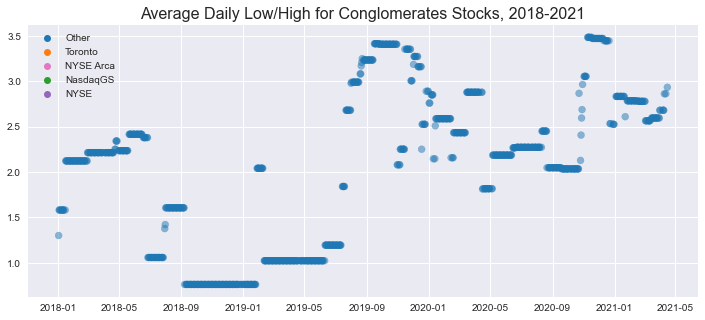

In [25]:
#now map average stock price by day


#ax.scatter(df['carat'], df['price'], c=df['color'].map(colors))

#list of unique exchanges
#colors = dict(zip(df_sect1["EXCHANGE"].unique(), matplotlib.cm.rainbow(np.linspace(0, 1, len(df_sect1["EXCHANGE"].unique())))

for i in range(len(sect_list)):
    df_sect = df_st.loc[df_st['SECTOR'] == sect_list[i]]
    df_sect1 =  df_sect.groupby(['DATE', 'EXCHANGE'],as_index=False).agg({'AVG_PRICE':'mean'})
    plt.scatter(df_sect1["DATE"], np.log(df_sect1["AVG_PRICE"]), c=df_sect1['EXCHANGE'].map(c_dictionary), alpha=0.5)
    plt.title('Average Daily Low/High for '+ str(sect_list[i])+' Stocks, 2018-2021', fontsize=16)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    
    # The following two lines generate custom fake lines that will be used as legend entries:
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in c_dictionary.values()]
    plt.legend(markers, c_dictionary.keys(), numpoints=1)
    plt.show()

    

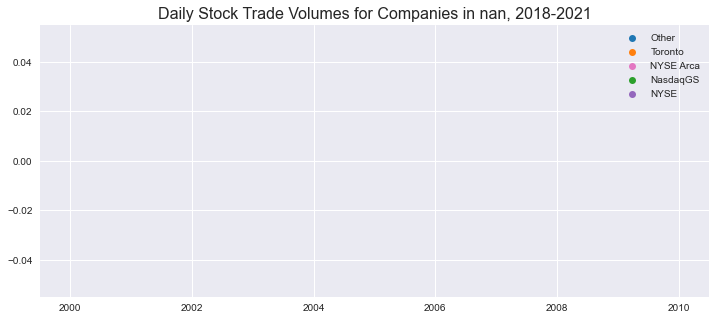

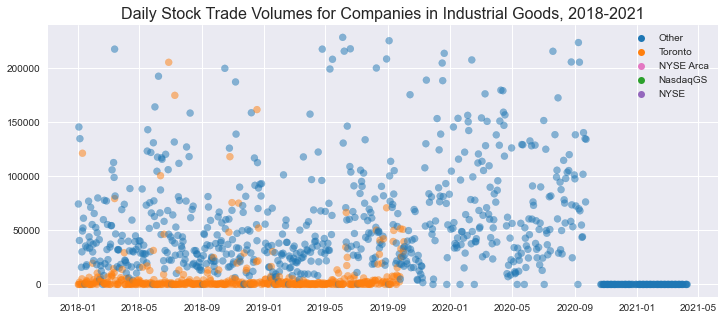

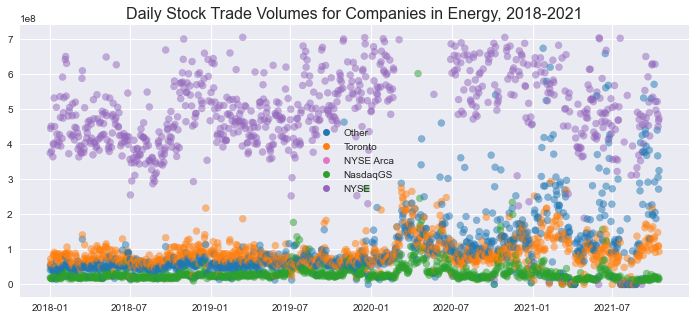

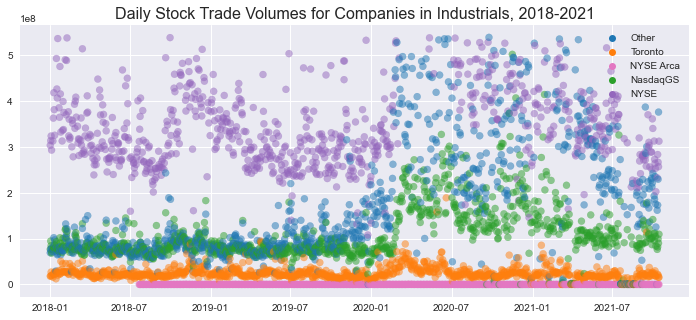

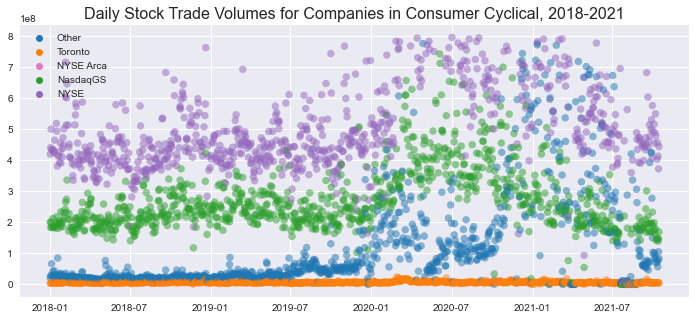

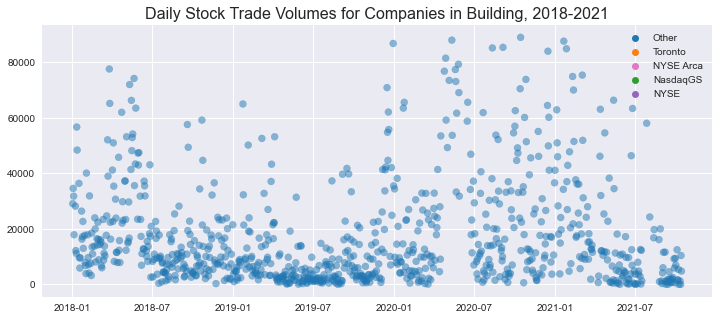

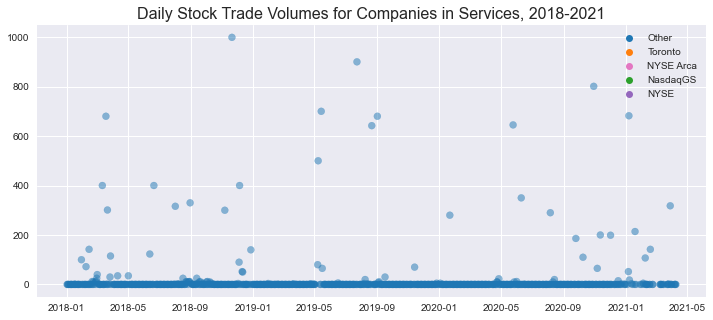

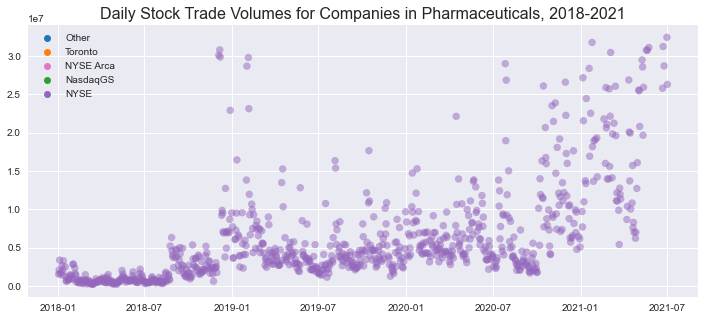

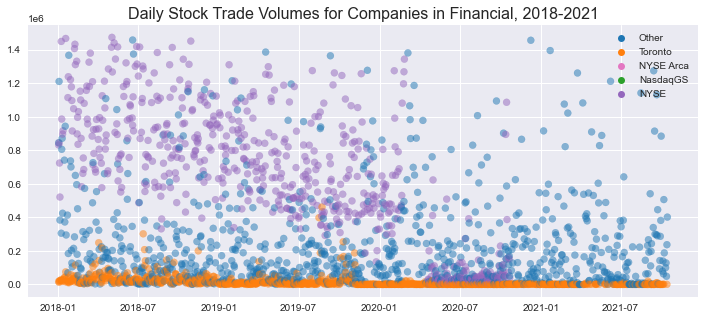

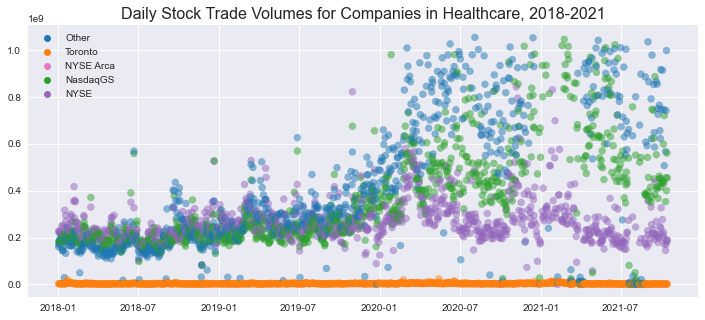

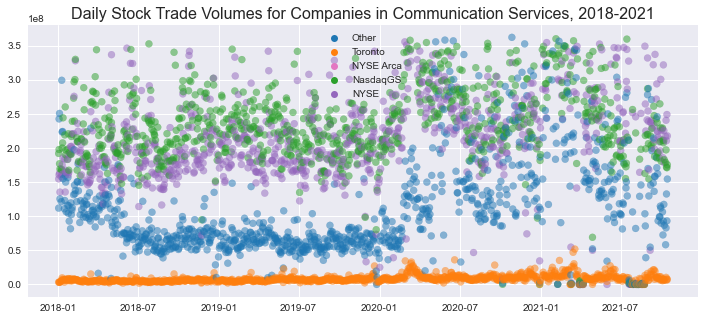

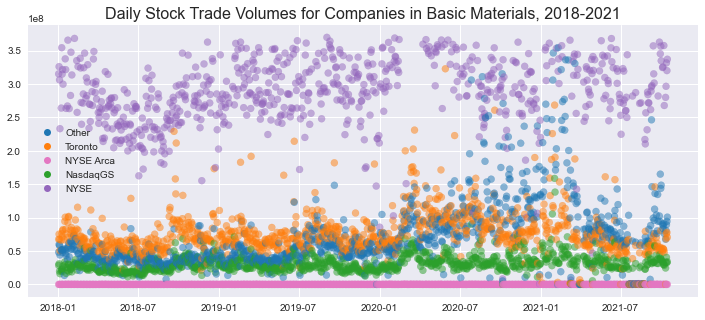

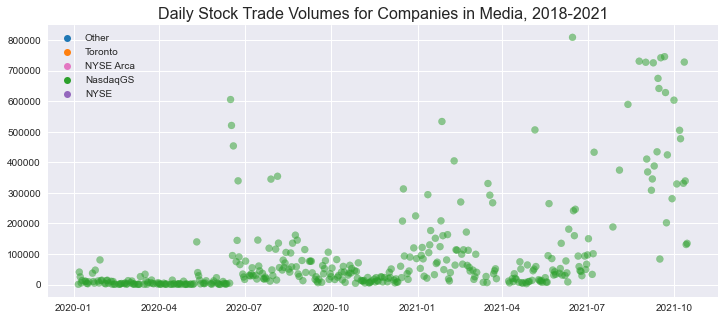

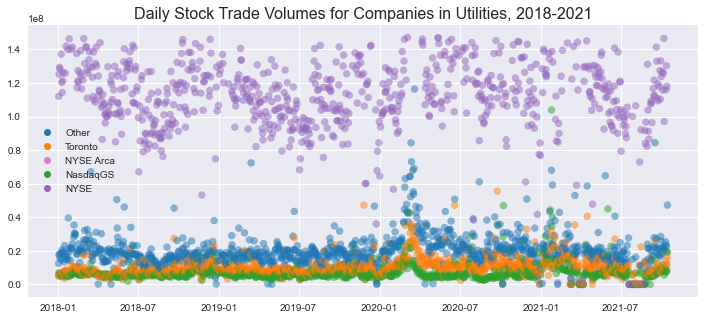

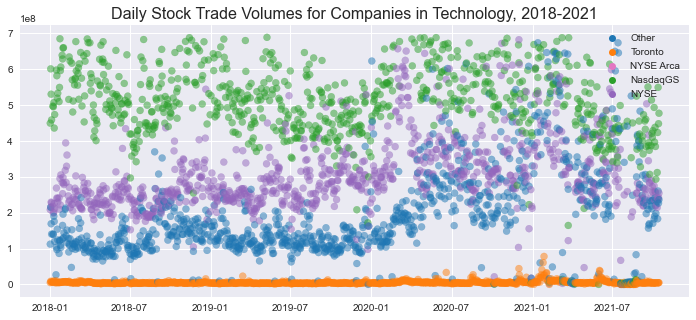

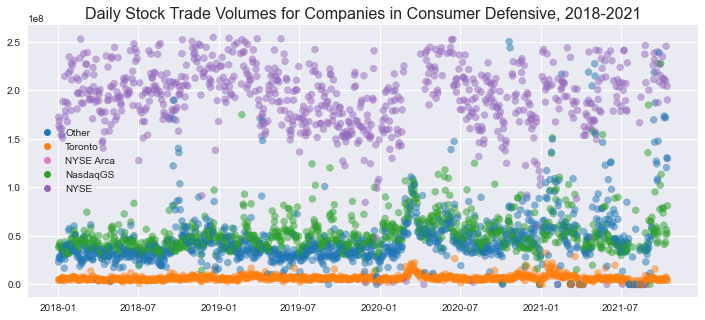

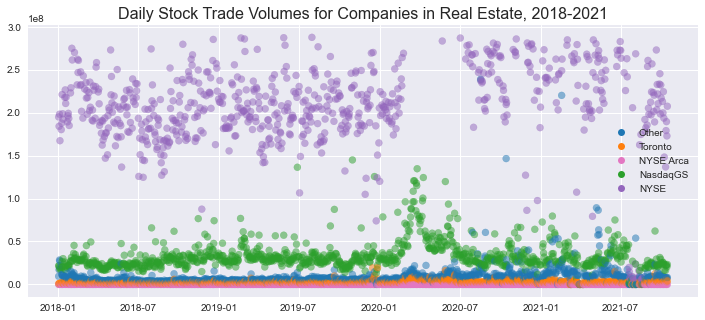

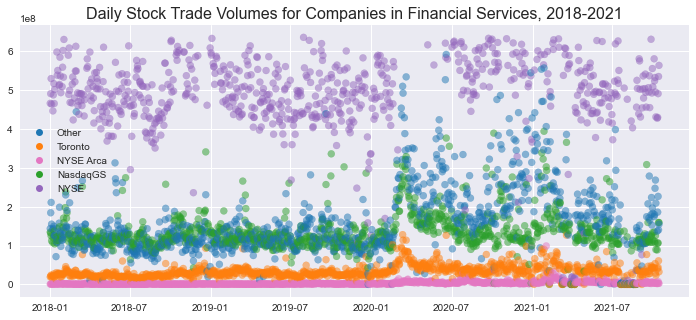

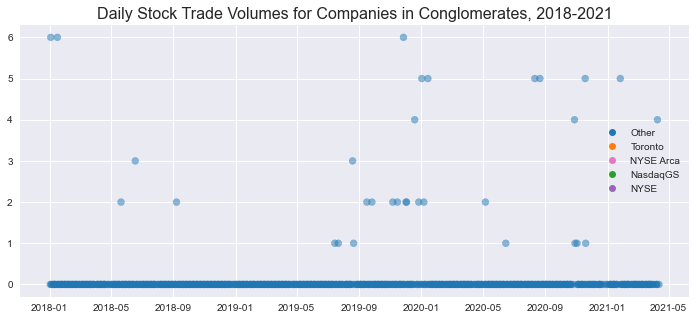

In [26]:
for i in range(len(sect_list)):
    df_sect = df_st.loc[df_st['SECTOR'] == sect_list[i]]
    df_sect1 =  df_sect.groupby(['DATE', 'EXCHANGE'],as_index=False).agg({'VOLUME':'sum'})
    df_sect1['VOLUME'] = df_sect1['VOLUME'][df_sect1['VOLUME'].between(df_sect1['VOLUME'].quantile(.0), df_sect1['VOLUME'].quantile(.95))] 
    plt.scatter(df_sect1["DATE"], df_sect1["VOLUME"], c=df_sect1['EXCHANGE'].map(c_dictionary), alpha=0.5)
    plt.title('Daily Stock Trade Volumes for Companies in '+ str(sect_list[i])+', 2018-2021', fontsize=16)
    plt.xlabel('', fontsize=14)
    plt.ylabel('', fontsize=14)
    
    
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in c_dictionary.values()]
    plt.legend(markers, c_dictionary.keys(), numpoints=1)
    plt.show()